In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)
conn = engine.connect

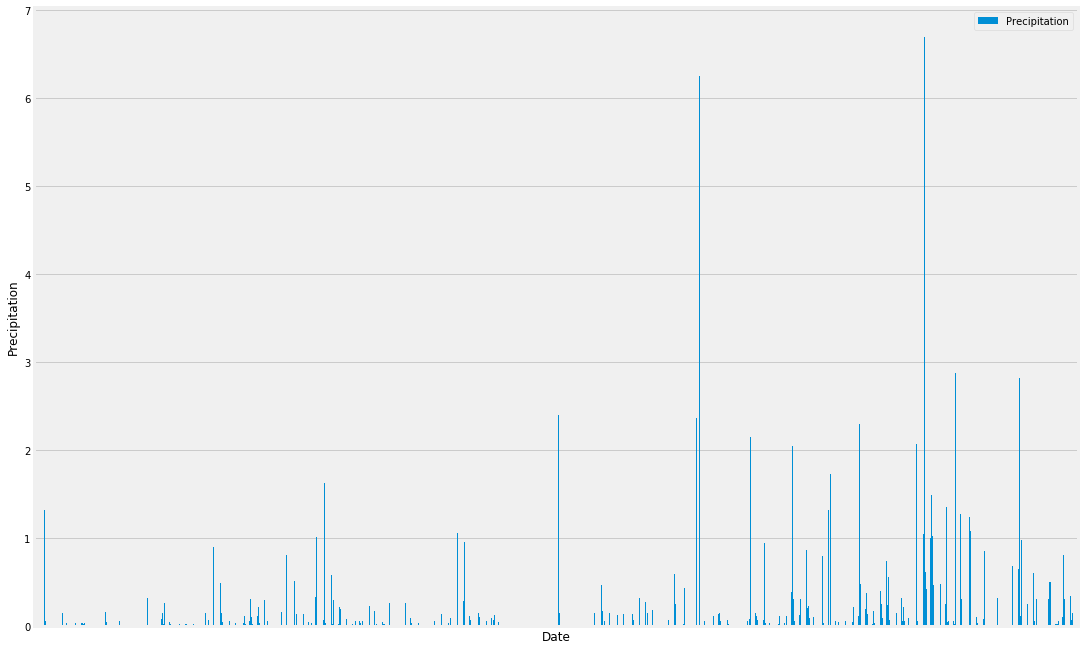

In [5]:
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()

last_year_df = pd.DataFrame(last_year, columns=['Date','Precipitation'])
last_year_df.set_index('Date', inplace=True)

last_year_df.plot(kind="bar", figsize= (15,10))

plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.xticks([])
plt.show()

In [6]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [7]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()


9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station = most_active_station[0]
most_active_station
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

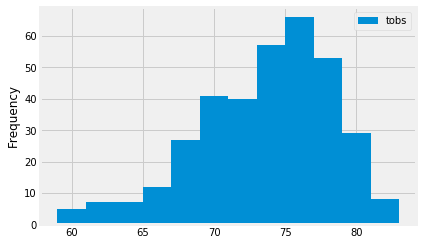

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.between('2016-08-23', '2017-08-23')).filter(Measurement.station == most_active_station).all()


temp_df = pd.DataFrame(most_active_station_temps)
temp_df.plot(kind="hist", bins=12)
plt.show()